# Fontes de consulta

In [62]:
# https://docs.aws.amazon.com/sagemaker/latest/dg/whatis.html

# https://docs.aws.amazon.com/wellarchitected/latest/machine-learning-lens/machine-learning-lens.html

# https://python.plainenglish.io/how-i-automated-data-cleaning-in-python-using-functions-and-pipelines-95b8ad0f6ea5

# Packges and configurations

In [63]:
# Padrão
import pandas as pd 
import numpy as np 

# Light GBM
import lightgbm as lgb

from sklearn.ensemble import RandomForestClassifier     # Random Forest

# Visualization
import squarify
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
import plotly
import seaborn as sns
sns.set_style('darkgrid')

# Others
import openpyxl
import xlrd
import os
import statistics
from math import isnan
import tqdm
import hashlib

# Metrics from Sklearn
from sklearn import set_config
from sklearn import metrics
from sklearn.metrics import (accuracy_score, 
                             classification_report, 
                             precision_score, 
                             recall_score, 
                             confusion_matrix, 
                             auc,
                             roc_curve, 
                             roc_auc_score, 
                             f1_score, 
                             auc)
from sklearn.pipeline import make_pipeline

# model selection
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score, KFold
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import RepeatedKFold

# Preprocessing
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import MinMaxScaler
import category_encoders as ce



In [64]:
# LOFO
from tqdm.autonotebook import tqdm
from lofo import LOFOImportance, Dataset, plot_importance

In [65]:
import warnings
warnings.filterwarnings("ignore", category = DeprecationWarning) 
warnings.filterwarnings("ignore", category = FutureWarning) 
warnings.filterwarnings("ignore", category = UserWarning) 

In [66]:
pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", None)
pd.set_option('display.float_format', lambda x: '%.3f' % x)

# Import dataframe

In [67]:
name_file_df = 'bank-full-case.csv'
df_teste = pd.read_csv(name_file_df, sep=";", encoding='UTF-8', low_memory=False)
df_teste = df_teste.reset_index()
df_teste = df_teste.rename(columns={'index': 'ID'})
df_teste.shape

(45211, 18)

# Data Preparation

## Read the Dataframe

In [68]:
df_teste.head()

,ID,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [69]:
df_teste.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 18 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   ID         45211 non-null  int64 
 1   age        45211 non-null  int64 
 2   job        45211 non-null  object
 3   marital    45211 non-null  object
 4   education  45211 non-null  object
 5   default    45211 non-null  object
 6   balance    45211 non-null  int64 
 7   housing    45211 non-null  object
 8   loan       45211 non-null  object
 9   contact    45211 non-null  object
 10  day        45211 non-null  int64 
 11  month      45211 non-null  object
 12  duration   45211 non-null  int64 
 13  campaign   45211 non-null  int64 
 14  pdays      45211 non-null  int64 
 15  previous   45211 non-null  int64 
 16  poutcome   45211 non-null  object
 17  y          45211 non-null  object
dtypes: int64(8), object(10)
memory usage: 6.2+ MB


In [70]:
def unique_values(df):
    all_cols = df.columns
    feature_name = []
    num_unique_val = []
    name_unique_val = []
    datatype = []
    
    for col in all_cols:
        feature_name.append(col)
        num_unique_val.append(df[col].nunique())
        name_unique_val.append(df[col].unique())
        datatype.append(df[col].dtype)
    return pd.DataFrame({'Feature Name': feature_name, 'Number of Unique Value': num_unique_val, 'Name of Unique Values': name_unique_val,'datatype': datatype})

In [71]:
unique_values(df_teste)

,Feature Name,Number of Unique Value,Name of Unique Values,datatype
0,ID,45211,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...",int64
1,age,77,"[58, 44, 33, 47, 35, 28, 42, 43, 41, 29, 53, 5...",int64
2,job,12,"[management, technician, entrepreneur, blue-co...",object
3,marital,3,"[married, single, divorced]",object
4,education,4,"[tertiary, secondary, unknown, primary]",object
5,default,2,"[no, yes]",object
6,balance,7168,"[2143, 29, 2, 1506, 1, 231, 447, 121, 593, 270...",int64
7,housing,2,"[yes, no]",object
8,loan,2,"[no, yes]",object
9,contact,3,"[unknown, cellular, telephone]",object


In [72]:
df_teste.columns

Index(['ID', 'age', 'job', 'marital', 'education', 'default', 'balance',
       'housing', 'loan', 'contact', 'day', 'month', 'duration', 'campaign',
       'pdays', 'previous', 'poutcome', 'y'],
      dtype='object')

In [73]:
feature_object = ['job', 'marital', 'education', 'default', 'housing',
       'loan', 'contact', 'month', 'poutcome', 'y']   

## EDA

In [74]:
plt.figure(figsize=(10, 6))

for Names in feature_object: 
    grouped_ = df_teste.groupby(Names)['ID'].count().reset_index()
    for i in range(0, len(grouped_)):
        grouped_.loc[i, 'Part_PCT'] = (grouped_.loc[i, 'ID'] / grouped_['ID'].sum()) * 100
    grouped_.sort_values(by = ['ID'], ascending = False, inplace = True)

    #squarify.plot(sizes=grouped_['ID'], label=grouped_[Names])
    print("*****************************************************************")
    print("************************ " + Names + " ************************")
    #plt.title(Names)
    #plt.show()

    print(grouped_)
    print("*****************************************************************")

*****************************************************************
************************ job ************************
              job    ID  Part_PCT
1     blue-collar  9732    21.526
4      management  9458    20.920
9      technician  7597    16.803
0          admin.  5171    11.437
7        services  4154     9.188
5         retired  2264     5.008
6   self-employed  1579     3.493
2    entrepreneur  1487     3.289
10     unemployed  1303     2.882
3       housemaid  1240     2.743
8         student   938     2.075
11        unknown   288     0.637
*****************************************************************
*****************************************************************
************************ marital ************************
    marital     ID  Part_PCT
1   married  27214    60.193
2    single  12790    28.290
0  divorced   5207    11.517
*****************************************************************
*****************************************************************


<Figure size 1000x600 with 0 Axes>

In [75]:
feature_int = ['age', 'balance', 'duration', 'campaign', 'pdays', 'previous']
feature_int_columns = []
feature_int_compare = pd.DataFrame(columns = feature_int_columns)

row_index = 0
for name in feature_int:
    feature_int_compare.loc[row_index,'Variável'] = name
    feature_int_compare.loc[row_index, 'N'] = df_teste[name].count()
    feature_int_compare.loc[row_index, 'Min'] = df_teste[name].min()
    feature_int_compare.loc[row_index, 'Max'] = df_teste[name].max()
    feature_int_compare.loc[row_index, 'Média'] = df_teste[name].mean()
    feature_int_compare.loc[row_index, 'Mediana'] = df_teste[name].median()
    feature_int_compare.loc[row_index, 'Desvio Padrão'] = df_teste[name].std()
    feature_int_compare.loc[row_index, 'Count 0'] = (df_teste[name] == 0).sum()
    row_index+=1

feature_int_compare.sort_values(by = ['Variável'], ascending = True, inplace = True)
round(feature_int_compare, 2)
    

,Variável,N,Min,Max,Média,Mediana,Desvio Padrão,Count 0
0,age,45211.000,18.000,95.000,40.940,39.000,10.620,0.000
1,balance,45211.000,-8019.000,102127.000,1362.270,448.000,3044.770,3514.000
3,campaign,45211.000,1.000,63.000,2.760,2.000,3.100,0.000
2,duration,45211.000,0.000,4918.000,258.160,180.000,257.530,3.000
4,pdays,45211.000,-1.000,871.000,40.200,-1.000,100.130,0.000
5,previous,45211.000,0.000,275.000,0.580,0.000,2.300,36954.000


## Clean (replace, impute, remove outliers and duplicates) 

In [76]:
df_teste.shape

(45211, 18)

In [77]:
df_copied = df_teste.copy()
df_copied.shape

(45211, 18)

In [78]:
# Define uma função para filtrar uma coluna abaixo de um valor
def filter_minor(df_, col_, value_):
    df_ = df_[(df_[col_] < value_)]
    return df_

### Variável 'balance'

In [79]:
df_copied = filter_minor(df_copied, 'balance', 80000)
df_copied.shape

(45207, 18)

In [80]:
len(df_copied[df_copied['balance'] < 0])

3766

### Variável 'duration'

In [81]:
df_teste['duration'].quantile(np.linspace(.1, 1, 9, 0))

0.100    58.000
0.200    89.000
0.300   117.000
0.400   147.000
0.500   180.000
0.600   223.000
0.700   280.000
0.800   368.000
0.900   548.000
Name: duration, dtype: float64

In [82]:
df_copied = filter_minor(df_copied, 'duration', 3000)
df_copied.shape

(45193, 18)

In [83]:
len(df_copied[df_copied['duration'] < 0])

0

### Variável 'previous'

In [84]:
len(df_copied[df_copied['previous'] > 50])

4

In [85]:
df_copied = filter_minor(df_copied, 'previous', 50)
df_copied.shape

(45189, 18)

### Check 1

In [86]:
feature_int = ['age', 'balance', 'duration', 'campaign', 'pdays', 'previous']
feature_int_columns = []
feature_int_compare = pd.DataFrame(columns = feature_int_columns)

row_index = 0
for name in feature_int:
    feature_int_compare.loc[row_index,'Variável'] = name
    feature_int_compare.loc[row_index, 'N'] = df_copied[name].count()
    feature_int_compare.loc[row_index, 'Min'] = df_copied[name].min()
    feature_int_compare.loc[row_index, 'Max'] = df_copied[name].max()
    feature_int_compare.loc[row_index, 'Média'] = df_copied[name].mean()
    feature_int_compare.loc[row_index, 'Mediana'] = df_copied[name].median()
    feature_int_compare.loc[row_index, 'Desvio Padrão'] = df_copied[name].std()
    feature_int_compare.loc[row_index, 'Count 0'] = (df_copied[name] == 0).sum()
    row_index+=1

feature_int_compare.sort_values(by = ['Variável'], ascending = True, inplace = True)
round(feature_int_compare, 2)

,Variável,N,Min,Max,Média,Mediana,Desvio Padrão,Count 0
0,age,45189.000,18.000,95.000,40.930,39.000,10.620,0.000
1,balance,45189.000,-8019.000,71188.000,1354.580,448.000,2925.540,3513.000
3,campaign,45189.000,1.000,63.000,2.760,2.000,3.100,0.000
2,duration,45189.000,0.000,2870.000,257.170,180.000,251.370,3.000
4,pdays,45189.000,-1.000,871.000,40.170,-1.000,100.060,0.000
5,previous,45189.000,0.000,41.000,0.570,0.000,1.860,36938.000


### Replace 0-1

In [87]:
# Convert string into interger - 0/1

feature_object = ['default', 'housing', 'loan', 'y']  
def binary_map(feature):
    return feature.map({'yes':1, 'no':0})

for  Names in feature_object:  
    df_copied[Names] = df_copied[[Names]].apply(binary_map)

In [88]:
df_copied.head()

,ID,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,0,58,management,married,tertiary,0,2143,1,0,unknown,5,may,261,1,-1,0,unknown,0
1,1,44,technician,single,secondary,0,29,1,0,unknown,5,may,151,1,-1,0,unknown,0
2,2,33,entrepreneur,married,secondary,0,2,1,1,unknown,5,may,76,1,-1,0,unknown,0
3,3,47,blue-collar,married,unknown,0,1506,1,0,unknown,5,may,92,1,-1,0,unknown,0
4,4,33,unknown,single,unknown,0,1,0,0,unknown,5,may,198,1,-1,0,unknown,0


## Feature creation

### Feature creation

In [89]:
df_copied['pdays'].value_counts()

pdays
-1      36938
 182      167
 92       147
 91       126
 183      126
 181      117
 370       99
 184       85
 364       77
 95        74
 350       73
 94        71
 175       71
 185       68
 93        65
 343       65
 188       64
 186       60
 189       60
 349       57
 96        57
 174       57
 363       55
 90        54
 97        54
 365       51
 196       51
 342       49
 98        49
 368       49
 357       49
 345       48
 351       48
 347       47
 178       47
 367       47
 190       46
 180       45
 195       45
 104       45
 99        45
 356       45
 172       44
 371       44
 344       44
 150       43
 170       43
 187       43
 87        43
 179       43
 169       42
 167       42
 176       42
 105       42
 352       40
 355       40
 360       38
 168       37
 272       37
 2         37
 359       36
 336       36
 358       35
 265       35
 102       35
 346       35
 171       34
 173       34
 330       33
 361       33
 369       33


In [90]:
# == -1 => 0 -> cliente não contactado
# != -1 => 1 -> cliente contactado
df_copied['New_pdays'] = np.where(df_copied['pdays'] == -1, 0, 1)
df_copied.shape

(45189, 19)

In [91]:
df_copied['New_pdays'].value_counts()

New_pdays
0    36938
1     8251
Name: count, dtype: int64

In [92]:
h = pd.DataFrame([round(q, 3) for q in statistics.quantiles(df_copied['balance'], n = 10)])
h

,0
0,0.000
1,22.000
2,130.000
3,272.000
4,448.000
5,701.000
6,1126.000
7,1859.000
8,3574.000


In [93]:
df_1 = df_copied[['ID', 'balance']]
h = pd.DataFrame([round(q, 3) for q in statistics.quantiles(df_1['balance'], n = 10)])
df_1['New_balance'] = np.where(df_1['balance'] >= h.loc[8, 0], "_10",
                      np.where(df_1['balance'] >= h.loc[7, 0], "_9",
                      np.where(df_1['balance'] >= h.loc[6, 0], "_8",
                      np.where(df_1['balance'] >= h.loc[5, 0], "_7",
                      np.where(df_1['balance'] >= h.loc[4, 0], "_6",
                      np.where(df_1['balance'] >= h.loc[3, 0], "_5",
                      np.where(df_1['balance'] >= h.loc[2, 0], "_4",
                      np.where(df_1['balance'] >= h.loc[1, 0], "_3", 
                      np.where(df_1['balance'] >= h.loc[0, 0], "_2", "_1")))))))))
df_1 = df_1.iloc[:,[0, 2]]
df_copied = df_copied.merge(df_1, on=['ID'], how='left')
df_copied.shape

C:\Users\luand\AppData\Local\Temp\ipykernel_9764\2448069521.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_1['New_balance'] = np.where(df_1['balance'] >= h.loc[8, 0], "_10",


(45189, 20)

In [94]:
h = pd.DataFrame([round(q, 3) for q in statistics.quantiles(df_copied['age'], n = 4)])
h.loc[3, 0] = 59
h

,0
0,33.000
1,39.000
2,48.000
3,59.000


In [95]:
df_1 = df_copied[['ID', 'age']]
h = pd.DataFrame([round(q, 3) for q in statistics.quantiles(df_1['age'], n = 4)])
h.loc[3, 0] = 59.0
df_1['New_age'] = np.where(df_1['age'] >= h.loc[3, 0], "Maior_59",
                  np.where(df_1['age'] >= h.loc[2, 0], "Entre_48_59",
                  np.where(df_1['age'] >= h.loc[1, 0], "Entre_39_48",
                  np.where(df_1['age'] >= h.loc[0, 0], "Entre_33_39", "Menor_33"))))
df_1 = df_1.iloc[:,[0, 2]]
df_copied = df_copied.merge(df_1, on=['ID'], how='left')
df_copied = df_copied.fillna(1)
df_copied.shape

C:\Users\luand\AppData\Local\Temp\ipykernel_9764\595408193.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_1['New_age'] = np.where(df_1['age'] >= h.loc[3, 0], "Maior_59",


(45189, 21)

In [96]:
h = pd.DataFrame([round(q, 3) for q in statistics.quantiles(df_copied['campaign'], n = 5)])
h

,0
0,1.000
1,2.000
2,2.000
3,4.000


In [97]:
df_1 = df_copied[['ID', 'campaign']]
df_1['New_campaign'] = np.where(df_1['campaign'] > 5, "Maior_5",
                       np.where(df_1['campaign'] == 5, "Igual_5",
                       np.where(df_1['campaign'] == 4, "Igual_4",
                       np.where(df_1['campaign'] == 3, "Igual_3",
                       np.where(df_1['campaign'] == 2, "Igual_2", "Igual_1")))))
df_1 = df_1.iloc[:,[0, 2]]
df_copied = df_copied.merge(df_1, on=['ID'], how='left')
df_copied.shape

C:\Users\luand\AppData\Local\Temp\ipykernel_9764\1803396700.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_1['New_campaign'] = np.where(df_1['campaign'] > 5, "Maior_5",


(45189, 22)

In [98]:
h = pd.DataFrame([round(q, 3) for q in statistics.quantiles(df_copied['previous'], n = 5)])
h

,0
0,0.000
1,0.000
2,0.000
3,0.000


### one-hot-encoding

In [99]:
# categorical columns without an order :

a = unique_values(df_copied)
a = a[(a['datatype'] == 'object')]
nominal_columns = a['Feature Name'].tolist()
nominal_columns

['job',
 'marital',
 'education',
 'contact',
 'month',
 'poutcome',
 'New_balance',
 'New_age',
 'New_campaign']

In [100]:
nominal_columns.remove("month")
nominal_columns

['job',
 'marital',
 'education',
 'contact',
 'poutcome',
 'New_balance',
 'New_age',
 'New_campaign']

In [101]:
for Names in nominal_columns: 
    encoder=ce.OneHotEncoder(cols=Names, handle_unknown='return_nan', return_df=True, use_cat_names=True)
    df_copied = encoder.fit_transform(df_copied)   


In [102]:
df_copied.head()

,ID,age,job_management,job_technician,job_entrepreneur,job_blue-collar,job_unknown,job_retired,job_admin.,job_services,job_self-employed,job_unemployed,job_housemaid,job_student,marital_married,marital_single,marital_divorced,education_tertiary,education_secondary,education_unknown,education_primary,default,balance,housing,loan,contact_unknown,contact_cellular,contact_telephone,day,month,duration,campaign,pdays,previous,poutcome_unknown,poutcome_failure,poutcome_other,poutcome_success,y,New_pdays,New_balance__9,New_balance__3,New_balance__2,New_balance__8,New_balance__4,New_balance__5,New_balance__6,New_balance__7,New_balance__1,New_balance__10,New_age_Entre_48_59,New_age_Entre_39_48,New_age_Entre_33_39,New_age_Menor_33,New_age_Maior_59,New_campaign_Igual_1,New_campaign_Igual_2,New_campaign_Igual_3,New_campaign_Igual_5,New_campaign_Igual_4,New_campaign_Maior_5
0,0,58,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,1.000,0.000,0.000,0.000,0,2143,1,0,1.000,0.000,0.000,5,may,261,1,-1,0,1.000,0.000,0.000,0.000,0,0,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000
1,1,44,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,1.000,0.000,0.000,0,29,1,0,1.000,0.000,0.000,5,may,151,1,-1,0,1.000,0.000,0.000,0.000,0,0,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000
2,2,33,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,1.000,0.000,0.000,0,2,1,1,1.000,0.000,0.000,5,may,76,1,-1,0,1.000,0.000,0.000,0.000,0,0,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000
3,3,47,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,1.000,0.000,0,1506,1,0,1.000,0.000,0.000,5,may,92,1,-1,0,1.000,0.000,0.000,0.000,0,0,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000
4,4,33,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,1.000,0.000,0,1,0,0,1.000,0.000,0.000,5,may,198,1,-1,0,1.000,0.000,0.000,0.000,0,0,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000


## Feature selection

### Part 1

In [103]:
df_copied.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,45189.000,22603.242,13051.317,0.000,11301.000,22601.000,33907.000,45210.000
age,45189.000,40.933,10.615,18.000,33.000,39.000,48.000,95.000
job_management,45189.000,0.209,0.407,0.000,0.000,0.000,0.000,1.000
job_technician,45189.000,0.168,0.374,0.000,0.000,0.000,0.000,1.000
job_entrepreneur,45189.000,0.033,0.178,0.000,0.000,0.000,0.000,1.000
job_blue-collar,45189.000,0.215,0.411,0.000,0.000,0.000,0.000,1.000
job_unknown,45189.000,0.006,0.080,0.000,0.000,0.000,0.000,1.000
job_retired,45189.000,0.050,0.218,0.000,0.000,0.000,0.000,1.000
job_admin.,45189.000,0.114,0.318,0.000,0.000,0.000,0.000,1.000
job_services,45189.000,0.092,0.289,0.000,0.000,0.000,0.000,1.000


In [104]:
df_copied = df_copied.drop(columns=["age", "balance", "day", "duration", "campaign", "pdays", 'month', "previous"])

In [105]:
df_copied.columns

Index(['ID', 'job_management', 'job_technician', 'job_entrepreneur',
       'job_blue-collar', 'job_unknown', 'job_retired', 'job_admin.',
       'job_services', 'job_self-employed', 'job_unemployed', 'job_housemaid',
       'job_student', 'marital_married', 'marital_single', 'marital_divorced',
       'education_tertiary', 'education_secondary', 'education_unknown',
       'education_primary', 'default', 'housing', 'loan', 'contact_unknown',
       'contact_cellular', 'contact_telephone', 'poutcome_unknown',
       'poutcome_failure', 'poutcome_other', 'poutcome_success', 'y',
       'New_pdays', 'New_balance__9', 'New_balance__3', 'New_balance__2',
       'New_balance__8', 'New_balance__4', 'New_balance__5', 'New_balance__6',
       'New_balance__7', 'New_balance__1', 'New_balance__10',
       'New_age_Entre_48_59', 'New_age_Entre_39_48', 'New_age_Entre_33_39',
       'New_age_Menor_33', 'New_age_Maior_59', 'New_campaign_Igual_1',
       'New_campaign_Igual_2', 'New_campaign_Igual_3'

In [106]:
df_copied.head()

,ID,job_management,job_technician,job_entrepreneur,job_blue-collar,job_unknown,job_retired,job_admin.,job_services,job_self-employed,job_unemployed,job_housemaid,job_student,marital_married,marital_single,marital_divorced,education_tertiary,education_secondary,education_unknown,education_primary,default,housing,loan,contact_unknown,contact_cellular,contact_telephone,poutcome_unknown,poutcome_failure,poutcome_other,poutcome_success,y,New_pdays,New_balance__9,New_balance__3,New_balance__2,New_balance__8,New_balance__4,New_balance__5,New_balance__6,New_balance__7,New_balance__1,New_balance__10,New_age_Entre_48_59,New_age_Entre_39_48,New_age_Entre_33_39,New_age_Menor_33,New_age_Maior_59,New_campaign_Igual_1,New_campaign_Igual_2,New_campaign_Igual_3,New_campaign_Igual_5,New_campaign_Igual_4,New_campaign_Maior_5
0,0,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,1.000,0.000,0.000,0.000,0,1,0,1.000,0.000,0.000,1.000,0.000,0.000,0.000,0,0,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000
1,1,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,1.000,0.000,0.000,0,1,0,1.000,0.000,0.000,1.000,0.000,0.000,0.000,0,0,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000
2,2,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,1.000,0.000,0.000,0,1,1,1.000,0.000,0.000,1.000,0.000,0.000,0.000,0,0,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000
3,3,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,1.000,0.000,0,1,0,1.000,0.000,0.000,1.000,0.000,0.000,0.000,0,0,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000
4,4,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,1.000,0.000,0,0,0,1.000,0.000,0.000,1.000,0.000,0.000,0.000,0,0,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000


## Scale (normalize, standardize) 

In [107]:
features_selected = df_copied.copy()

In [108]:
features_selected = features_selected.set_index(['ID'])
features_selected.shape

(45189, 52)

In [109]:
features_selected['y'].value_counts(normalize=True)*100

y
0   88.318
1   11.682
Name: proportion, dtype: float64

In [110]:
features_selected.info()

<class 'pandas.core.frame.DataFrame'>
Index: 45189 entries, 0 to 45210
Data columns (total 52 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   job_management        45189 non-null  float64
 1   job_technician        45189 non-null  float64
 2   job_entrepreneur      45189 non-null  float64
 3   job_blue-collar       45189 non-null  float64
 4   job_unknown           45189 non-null  float64
 5   job_retired           45189 non-null  float64
 6   job_admin.            45189 non-null  float64
 7   job_services          45189 non-null  float64
 8   job_self-employed     45189 non-null  float64
 9   job_unemployed        45189 non-null  float64
 10  job_housemaid         45189 non-null  float64
 11  job_student           45189 non-null  float64
 12  marital_married       45189 non-null  float64
 13  marital_single        45189 non-null  float64
 14  marital_divorced      45189 non-null  float64
 15  education_tertiary    45

## Partition

In [111]:
X = features_selected.drop(columns='y')
y = features_selected['y']

In [112]:
X.shape, y.shape

((45189, 51), (45189,))

In [113]:
random_ = 2023
X_train, X_test, y_train, y_test = train_test_split(X , y, test_size=0.25, random_state=random_, stratify=y)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((33891, 51), (11298, 51), (33891,), (11298,))

# Train, Tune and Evaluate

## Model Training

In [143]:
clf = lgb.LGBMClassifier(n_jobs=-1, random_state=random_)
#clf = lgb.LGBMClassifier(learning_rate = 0.125, metric = 'l1', n_estimators = 20, num_leaves = 38, n_jobs=-1, random_state=random_)

model = clf.fit(X_train,y_train)

predicted = model.predict(X_test)

y_pred = clf.predict_proba(X_test)[:,1]

y_pred_train = clf.predict_proba(X_train)[:,1]

probabilities = clf.predict_proba(X_test)[:,1]

fp, tp, th = roc_curve(y_test, predicted)

predictions = clf.predict(X_test)

conf_matrix = confusion_matrix(y_test, predicted)

[LightGBM] [Info] Number of positive: 3959, number of negative: 29932
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001525 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 102
[LightGBM] [Info] Number of data points in the train set: 33891, number of used features: 51
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.116816 -> initscore=-2.022937
[LightGBM] [Info] Start training from score -2.022937


## Validation Metrics

In [144]:
print("accuracy of testing data.: {:.4f}".format(roc_auc_score(y_test, y_pred)))
print("accuracy of training data: {:.4f}".format(roc_auc_score(y_train, y_pred_train)))
# The training and test set accuracy are quite comparable. So, we cannot say there is overfitting.
print('Training accuracy........: {:.4f}'.format(clf.score(X_train, y_train)))
print('Testing accuracy.........: {:.4f}'.format(clf.score(X_test, y_test)))

print('accuracy score...........: {:.4f}'.format(accuracy_score(y_test, predicted)))
print('precision score..........: {:.4f}'.format(precision_score(y_test, predicted)))
print('recall score.............: {:.4f}'.format(recall_score(y_test, predicted)))
print('f1 score.................: {:.4f}'.format(f1_score(y_test, predicted, average='weighted')))
print('auc......................: {:.4f}'.format(auc(fp, tp)))

accuracy of testing data.: 0.7523
accuracy of training data: 0.8238
Training accuracy........: 0.8949
Testing accuracy.........: 0.8944
accuracy score...........: 0.8944
precision score..........: 0.6684
recall score.............: 0.1909
f1 score.................: 0.8674
auc......................: 0.5892


In [145]:
print(metrics.classification_report(y_test, predicted))

              precision    recall  f1-score   support

           0       0.90      0.99      0.94      9978
           1       0.67      0.19      0.30      1320

    accuracy                           0.89     11298
   macro avg       0.79      0.59      0.62     11298
weighted avg       0.87      0.89      0.87     11298



In [146]:
#confusion matrix
print(metrics.confusion_matrix(y_test, predicted))
#                           Valor Predito
#                        Negativo - Positivo
# Valor Atual - Negativo [   TN   -   FP   ]
# Valor Atual - Positivo [   FN   -   TP   ]

[[9853  125]
 [1068  252]]


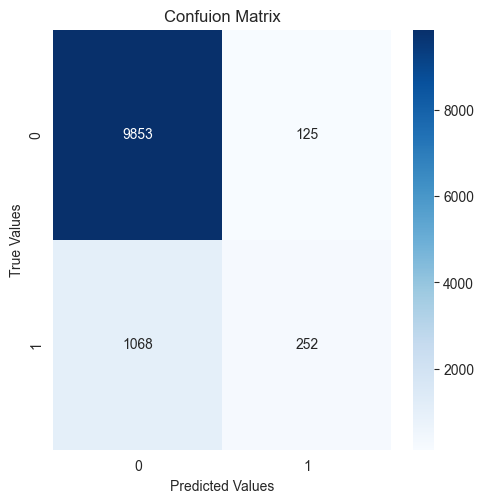

In [147]:
plt.figure(figsize=(12,12))
plt.subplot(221)
sns.heatmap(conf_matrix, fmt = "d",annot=True, cmap='Blues')
plt.title('Confuion Matrix')
plt.ylabel('True Values')
plt.xlabel('Predicted Values')
plt.show()

Area under curve :  0.7522648690756026 



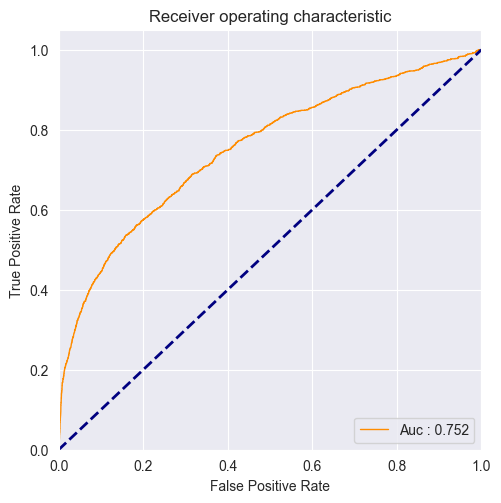

In [148]:
#roc_auc_score
model_roc_auc = roc_auc_score(y_test, probabilities)
print ("Area under curve : ",model_roc_auc,"\n")
fpr,tpr,thresholds = roc_curve(y_test ,probabilities)

plt.figure(figsize=(12,12))
plt.subplot(222)
plt.plot(fpr, tpr, color='darkorange', lw=1, label = "Auc : %.3f" %model_roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")

plt.show()

## Feature Importance

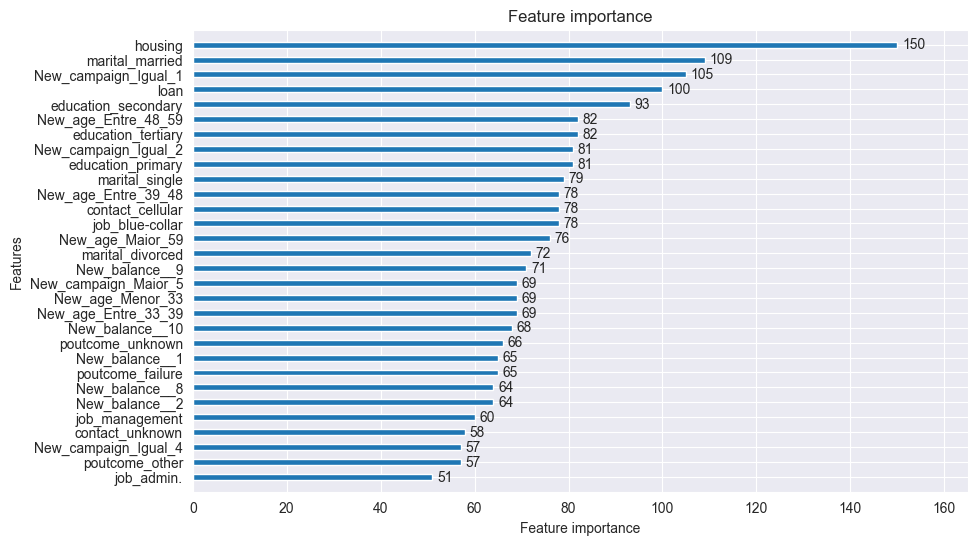

In [149]:
lgb.plot_importance(clf, height = 0.4, 
                         max_num_features = 30, 
                         figsize = (10,6))
plt.show()

In [150]:
coefficients = pd.DataFrame(clf.feature_importances_)
column_df = pd.DataFrame(X.columns)
coef_sumry = (pd.merge(coefficients, column_df, left_index= True, right_index=True, how = "left"))
coef_sumry.columns = ["coefficients__","features"]
coef_sumry['coefficients'] = 0.0
for i in range(0, len(coef_sumry)):
    coef_sumry.loc[i, 'coefficients'] = (coef_sumry.loc[i, 'coefficients__'] / coef_sumry['coefficients__'].sum()) * 100
coef_sumry = coef_sumry.sort_values(by = "coefficients",ascending = False)
coef_sumry = coef_sumry[["features", "coefficients"]]
coef_sumry

,features,coefficients
20,housing,5.000
12,marital_married,3.633
45,New_campaign_Igual_1,3.500
21,loan,3.333
16,education_secondary,3.100
40,New_age_Entre_48_59,2.733
15,education_tertiary,2.733
46,New_campaign_Igual_2,2.700
18,education_primary,2.700
13,marital_single,2.633


In [151]:
features_importances = pd.DataFrame(columns=['feature_name','feature_importance'])
features_importances['feature_name'] = clf.feature_name_
features_importances['feature_importance'] = clf.feature_importances_
features_importances.sort_values('feature_importance', ascending=False)

,feature_name,feature_importance
20,housing,150
12,marital_married,109
45,New_campaign_Igual_1,105
21,loan,100
16,education_secondary,93
40,New_age_Entre_48_59,82
15,education_tertiary,82
46,New_campaign_Igual_2,81
18,education_primary,81
13,marital_single,79


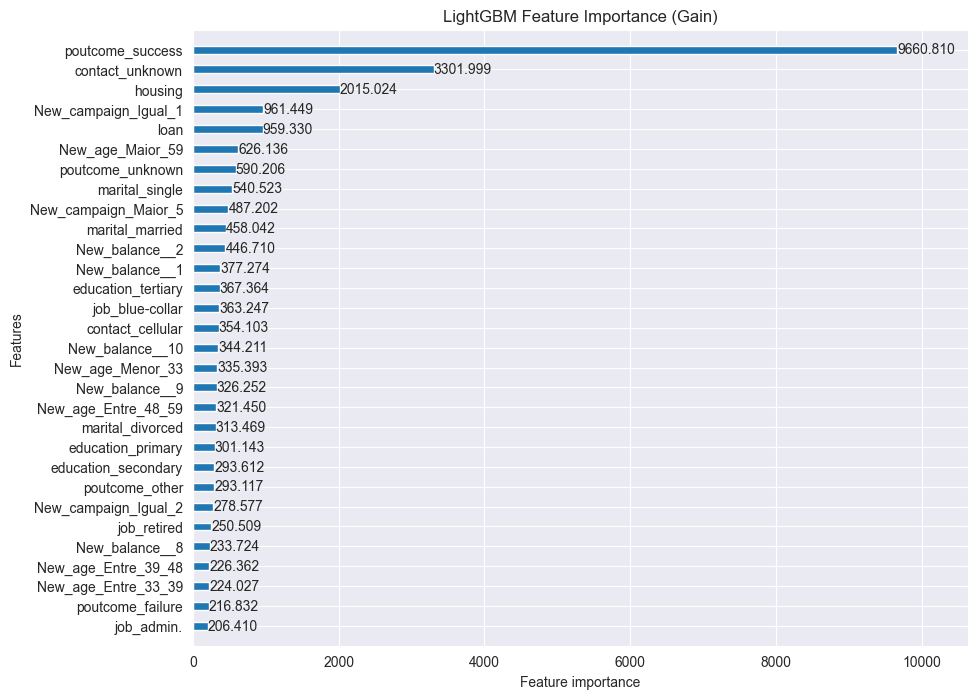

In [152]:
lgb.plot_importance(clf, height = 0.4, importance_type="gain",
                         max_num_features = 30, title="LightGBM Feature Importance (Gain)",
                         figsize = (10, 8))
plt.show()

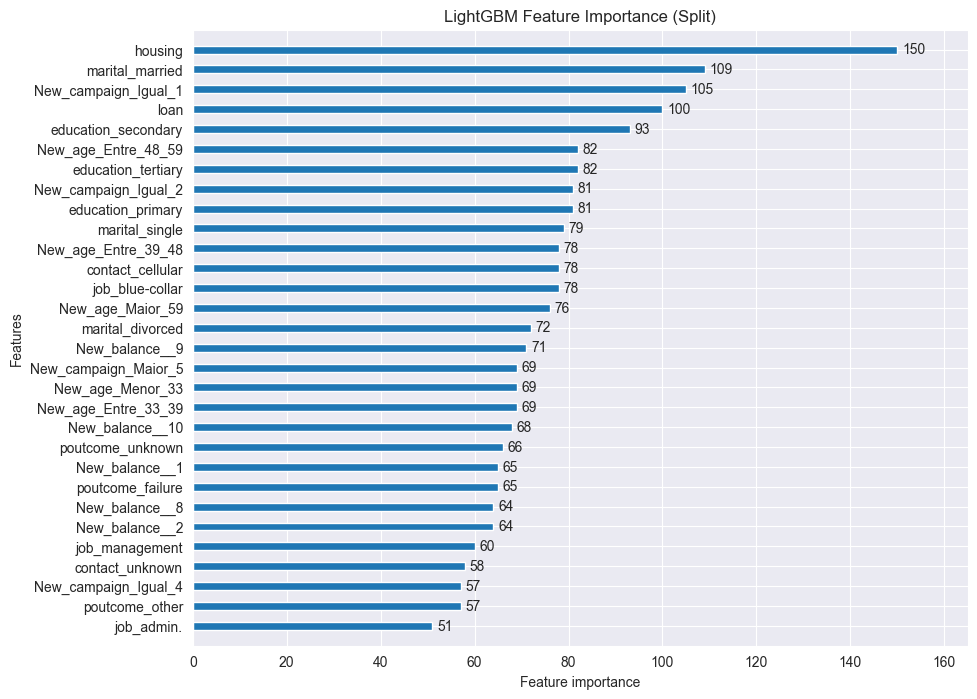

In [153]:
lgb.plot_importance(clf, height = 0.4, importance_type="split",
                         max_num_features = 30, title="LightGBM Feature Importance (Split)",
                         figsize = (10, 8))
plt.show()

## Using LOFO

In [154]:
sample_df = features_selected.sample(frac=0.03, random_state=0)
sample_df.sort_values("y", inplace=True) # Sort by time for time split validation
sample_df.shape

(1356, 52)

In [155]:
dataset = Dataset(df=sample_df, target="y", features=[col for col in sample_df.columns if col != "y"])

In [156]:
lofo_imp = LOFOImportance(dataset, model=clf, scoring="roc_auc")

In [157]:
warnings.filterwarnings('ignore')
importance_df = lofo_imp.get_importance()
importance_df.head()

[LightGBM] [Info] Number of positive: 119, number of negative: 898
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001463 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 98
[LightGBM] [Info] Number of data points in the train set: 1017, number of used features: 49
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.117011 -> initscore=-2.021047
[LightGBM] [Info] Start training from score -2.021047
[LightGBM] [Info] Number of positive: 119, number of negative: 898
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000100 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 98
[LightGBM] [Info] Number of data points in the train set: 1017, number of used features: 49
[LightGBM] [Info] [binary:BoostF

  0%|          | 0/51 [00:00<?, ?it/s]

[LightGBM] [Info] Number of positive: 119, number of negative: 898
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000256 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 96
[LightGBM] [Info] Number of data points in the train set: 1017, number of used features: 48
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.117011 -> initscore=-2.021047
[LightGBM] [Info] Start training from score -2.021047
[LightGBM] [Info] Number of positive: 119, number of negative: 898
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000285 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 96
[LightGBM] [Info] Number of data points in the train set: 1017, number of used features: 48
[LightGBM] [Info] [binary:BoostF

,feature,importance_mean,importance_std,val_imp_0,val_imp_1,val_imp_2,val_imp_3
29,education_primary,0.001,0.021,0.029,-0.024,0.014,-0.014
35,job_retired,0.001,0.020,0.026,-0.013,0.015,-0.024
13,New_balance__2,0.000,0.013,0.021,-0.014,0.000,-0.007
30,default,0.000,0.000,0.000,0.000,0.000,0.000
43,New_pdays,0.000,0.000,0.000,0.000,0.000,0.000


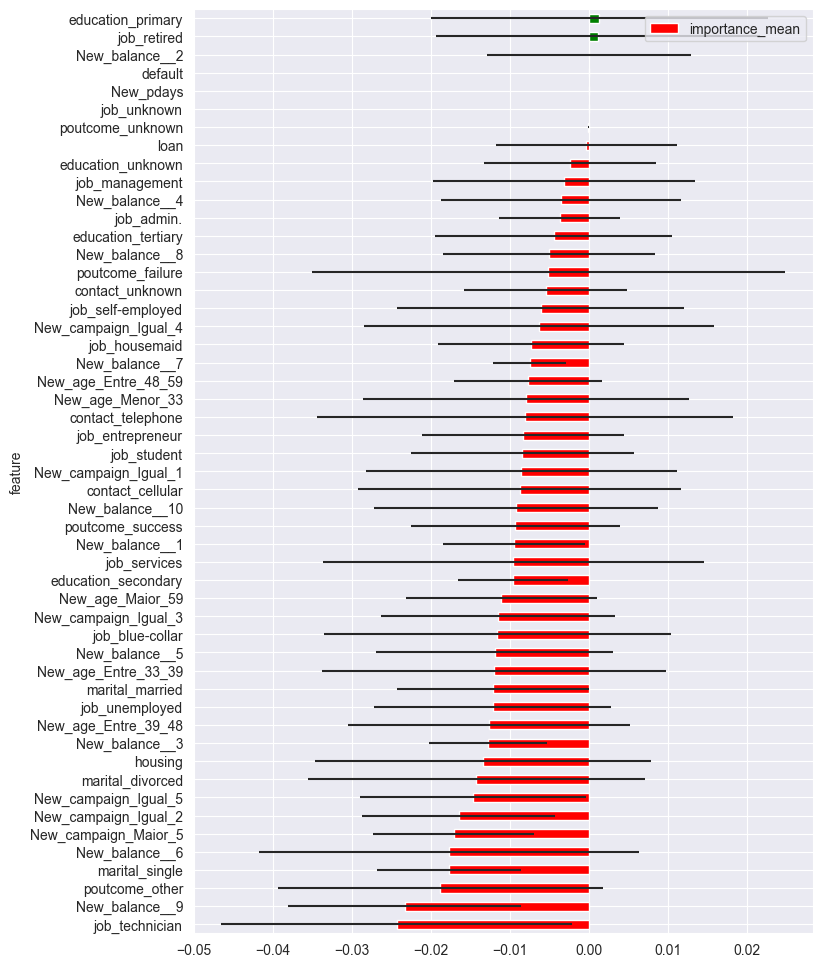

In [158]:
plot_importance(importance_df, figsize=(8,12))

## Cross Validation

### k-fold Cross-Validation

In [159]:
train_scores = cross_val_score(model, X_train, y_train, cv = 5, scoring='f1')
train_scores

[LightGBM] [Info] Number of positive: 3167, number of negative: 23945
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001000 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 102
[LightGBM] [Info] Number of data points in the train set: 27112, number of used features: 51
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.116812 -> initscore=-2.022975
[LightGBM] [Info] Start training from score -2.022975
[LightGBM] [Info] Number of positive: 3167, number of negative: 23946
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000910 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 102
[LightGBM] [Info] Number of data points in the train set: 27113, number of used features: 51
[LightGBM] [Info] [bin

array([0.26930693, 0.26236125, 0.25910931, 0.30590513, 0.26785714])

In [160]:
# As we can see that the performance of the model on test data is same as training data. So, we can conclude that there is no overfitting and underfitting.
np.mean(train_scores)

0.2729079534479547

In [ ]:
# Check for Overfitting

print('Training set score: {:.4f}'.format(clf.score(X_train, y_train)))

print('Test set score: {:.4f}'.format(clf.score(X_test, y_test)))

Training set score: 0.8949
Test set score: 0.8944
